## **Analisis del sector Agricola en el Valle del Cauca 2019-2023**

### **Objetivo:**

El objetivo de este trabajo es conocer la evolución del sector agrícola en el Valle del Cauca, haciendo un zoom en los principales cultivos permanentes y transitorios, los principales municipios productores del departamentos, la productividad por hectarea, el área sembrada y la producción de cultivos.

### **0. Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **1. Carga del Dataset**
Estos datos se obtienen del Ministerio de Agricultura, Unidad de Planificación Rural Agropecuaria (UPRA)

In [5]:
## Carga del dataset

data = pd.read_excel('Base_EVA_AGRICOLA_2019_2023.xlsx', sheet_name='BaseSIPRA')

In [7]:
data.head()

,codigoDepartamento,departamento,codigoMunicipio,municipio,especie,nombre_tipo_ciclo,grupo_especie,subGrupo_Especie,anho,Periodo,AreaSembrada,AreaCosechada,produccio,rendimiento,cod_cultiv,nombre_cientifico,EstadoFisicoProduccio,Clasifica_grupo
0,5,Antioquia,5001,Medellín,Aguacate,Permanente,Frutales,Demás frutales,2019,2019,24.00,23.00,138.00,6.00,20402,Persea americana,En fresco,Alimentos
1,5,Antioquia,5001,Medellín,Aguacate,Permanente,Frutales,Demás frutales,2020,2020,24.00,19.00,114.00,6.00,20402,Persea americana,En fresco,Alimentos
2,5,Antioquia,5001,Medellín,Aguacate,Permanente,Frutales,Demás frutales,2021,2021,23.52,19.52,117.12,6.00,20402,Persea americana,En fresco,Alimentos
3,5,Antioquia,5001,Medellín,Aguacate,Permanente,Frutales,Demás frutales,2022,2022,32.17,23.52,141.12,6.00,20402,Persea americana,En fresco,Alimentos
4,5,Antioquia,5001,Medellín,Aguacate,Permanente,Frutales,Demás frutales,2023,2023,25.97,19.52,128.12,6.56,20402,Persea americana,En fresco,Alimentos


In [8]:
data.shape

(105575, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105575 entries, 0 to 105574
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   codigoDepartamento     105575 non-null  int64  
 1   departamento           105575 non-null  object 
 2   codigoMunicipio        105575 non-null  int64  
 3   municipio              105575 non-null  object 
 4   especie                105575 non-null  object 
 5   nombre_tipo_ciclo      105575 non-null  object 
 6   grupo_especie          105575 non-null  object 
 7   subGrupo_Especie       105575 non-null  object 
 8   anho                   105575 non-null  int64  
 9   Periodo                105575 non-null  object 
 10  AreaSembrada           105575 non-null  float64
 11  AreaCosechada          105575 non-null  float64
 12  produccio              105575 non-null  float64
 13  rendimiento            105575 non-null  float64
 14  cod_cultiv             105575 non-nu

### **2. Analisis Exploratorio de Datos (EDA)**


In [13]:
# Selecciona solo las columnas categóricas
columnas_categoricas = data.select_dtypes(include=['object'])

# Itera sobre las columnas categóricas y muestra los valores únicos
for columna in columnas_categoricas:
    print(f"Valores únicos en '{columna}': {data[columna].unique()}")

Valores únicos en 'departamento': ['Antioquia' 'Atlántico' 'Bolívar' 'Boyacá' 'Caldas' 'Caquetá' 'Cauca'
 'Cesar' 'Córdoba' 'Cundinamarca' 'Chocó' 'Huila' 'La Guajira' 'Magdalena'
 'Meta' 'Nariño' 'Norte de Santander' 'Quindío' 'Risaralda' 'Santander'
 'Sucre' 'Tolima' 'Valle del Cauca' 'Arauca' 'Casanare' 'Putumayo'
 'Archipiélago de San Andrés, Providencia y Santa Catalina' 'Amazonas'
 'Guainía' 'Guaviare' 'Vaupés' 'Vichada']
Valores únicos en 'municipio': ['Medellín' 'Abejorral' 'Abriaquí' ... 'La Primavera' 'Santa Rosalía'
 'Cumaribo']
Valores únicos en 'especie': ['Aguacate' 'Ahuyama' 'Ají' 'Ajo' 'Apio' 'Arveja' 'Brevo' 'Brócoli' 'Café'
 'Caña' 'Cebolla de bulbo' 'Cebolla de rama' 'Cilantro' 'Col' 'Coliflor'
 'Espinaca' 'Fresa' 'Frijol' 'Guayaba' 'Haba' 'Habichuela' 'Lechuga'
 'Lima' 'Limón' 'Mandarina' 'Mango' 'Mora' 'Naranja' 'Otras hortalizas'
 'Papa' 'Pepino Cohombro' 'Perejil' 'Pimentón' 'Plátano' 'Rábano'
 'Remolacha' 'Repollo' 'Tomate' 'Tomate de árbol' 'Yuca' 'Zanahoria'
 

       departamento nombre_tipo_ciclo  AreaSembrada
0          Amazonas        Permanente       2234.50
1          Amazonas       Transitorio       1686.60
2         Antioquia        Permanente     339890.07
3         Antioquia       Transitorio      96954.53
4            Arauca        Permanente      66108.00
..              ...               ...           ...
59  Valle del Cauca       Transitorio      30092.33
60           Vaupés        Permanente        724.24
61           Vaupés       Transitorio       2369.54
62          Vichada        Permanente      27885.43
63          Vichada       Transitorio       2517.63

[64 rows x 3 columns]


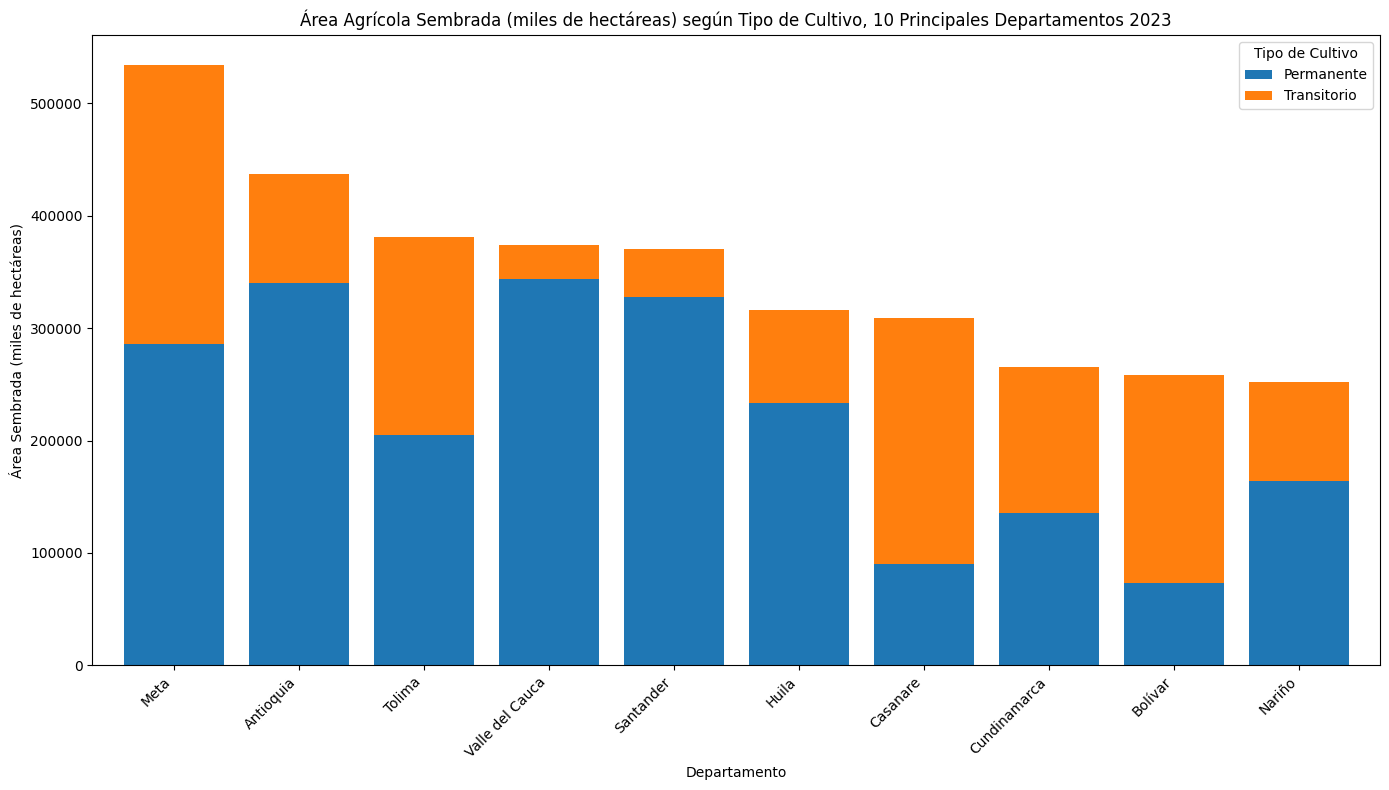

In [36]:
##### Área agrícola sembrada (miles de hectáreas) según tipo de cultivo, 10 principales departamentos 2023

data_2023 = data[data['anho'] == 2023]

# Agrupar los datos por municipio y tipo de ciclo, y calcular la suma del área sembrada

area_sembrada_por_departamento = data_2023.groupby(['departamento', 'nombre_tipo_ciclo'])['AreaSembrada'].sum().reset_index()

# Calcular la suma total del área sembrada por departamento para filtrar los 10 principales departamentos
total_area_por_departamento = area_sembrada_por_departamento.groupby('departamento')['AreaSembrada'].sum().reset_index()

print(area_sembrada_por_departamento)

# Seleccionar los 10 principales departamentos
top_10_departamentos = total_area_por_departamento.nlargest(10, 'AreaSembrada')['departamento']

# Filtrar los datos para los 10 principales departamentos
area_sembrada_top_10 = area_sembrada_por_departamento[area_sembrada_por_departamento['departamento'].isin(top_10_departamentos)]

# Reorganizar los datos para graficarlos
area_sembrada_pivot = area_sembrada_top_10.pivot(index='departamento', columns='nombre_tipo_ciclo', values='AreaSembrada')

# Ordenar los datos de menor a mayor por la suma total del área sembrada
area_sembrada_pivot['Total'] = area_sembrada_pivot.sum(axis=1)
area_sembrada_pivot = area_sembrada_pivot.sort_values(by='Total', ascending=False).drop(columns='Total')

# Graficar los datos como barras apiladas
ax = area_sembrada_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)

# Añadir títulos y etiquetas
ax.set_title('Área Agrícola Sembrada (miles de hectáreas) según Tipo de Cultivo, 10 Principales Departamentos 2023')
ax.set_xlabel('Departamento')
ax.set_ylabel('Área Sembrada (miles de hectáreas)')
ax.legend(title='Tipo de Cultivo')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [41]:
#### Tabla Área Cultivada en Valle del Cauca (hectáreas) según Grupo de Cultivos 
#### y su peso (%) departamental y nacional 2019 y 2023

# Filtrar los datos para los años 2019 y 2023
data_2019_2023 = data[data['anho'].isin([2019,2023])]

# Agrupar los datos por grupo de cultivo y año, y calcular la suma del área sembrada
area_sembrada_por_grupo = data_2019_2023.groupby(['grupo_especie', 'anho'])['AreaSembrada'].sum().unstack().reset_index()

# Renombrar las columnas para claridad
area_sembrada_por_grupo.columns = ['Grupo de Cultivo', '2019', '2023']

#Calcular el total para cada año
total_2019 = area_sembrada_por_grupo['2019'].sum()
total_2023 = area_sembrada_por_grupo['2023'].sum()

# Calcular el total nacional del área sembrada para 2023
total_nacional_2023 = data[data['anho'] == 2023]['AreaSembrada'].sum()

# Calcular los pesos porcentuales para 2023

area_sembrada_por_grupo['Peso (%) Valle 23'] = (area_sembrada_por_grupo['2023']/ total_2023)*100
area_sembrada_por_grupo['Peso (%) Col 23'] = (area_sembrada_por_grupo['2023'] / total_nacional_2023) * 100

# Calcular el total de las columnas de 2019 y 2023
total_row = pd.DataFrame({
    'Grupo de Cultivo': ['Total'],
    '2019': [total_2019],
    '2023': [total_2023],
    'Peso (%) Valle 23': [100],
    'Peso (%) Col 23': [(total_2023 / total_nacional_2023) * 100]
})

# Añadir la fila de totales a la tabla
area_sembrada_por_grupo = pd.concat([area_sembrada_por_grupo, total_row], ignore_index=True)

# Mostrar la tabla resultante
area_sembrada_por_grupo



,Grupo de Cultivo,2019,2023,Peso (%) Valle 23,Peso (%) Col 23
0,Cereales,1.214717e+06,1232783.520,22.390801,22.390801
1,"Cultivos para condimentos, bebidas medicinales...",5.625220e+03,4281.140,0.077757,0.077757
2,Cultivos tropicales tradicionales,1.631355e+06,1653497.799,30.032151,30.032151
3,Frutales,9.590376e+05,1092221.990,19.837810,19.837810
4,Hortalizas,1.231986e+05,127451.140,2.314870,2.314870
5,Leguminosas,1.592956e+05,137152.060,2.491066,2.491066
6,Oleaginosas,7.171749e+05,767057.820,13.931918,13.931918
7,Raíces y tubérculos,4.537116e+05,491313.360,8.923627,8.923627
8,Total,5.264116e+06,5505758.829,100.000000,100.000000
